In [1]:
import pandas as pd 
import numpy as np 


In [2]:
Nasdaq = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[3]
Nasdaq


Company Ticker             GICS Sector  \
0          Activision Blizzard   ATVI  Communication Services   
1                   Adobe Inc.   ADBE  Information Technology   
2                          ADP    ADP  Information Technology   
3                       Airbnb   ABNB  Consumer Discretionary   
4             Align Technology   ALGN             Health Care   
..                         ...    ...                     ...   
97    Walgreens Boots Alliance    WBA        Consumer Staples   
98               Workday, Inc.   WDAY  Information Technology   
99                 Xcel Energy    XEL               Utilities   
100  Zoom Video Communications     ZM  Information Technology   
101                    Zscaler     ZS  Information Technology   

                         GICS Sub-Industry  
0           Interactive Home Entertainment  
1                     Application Software  
2    Data Processing & Outsourced Services  
3       Internet & Direct Marketing Retail  
4                     Health Care Supplies  
..                                     ...  
97                             Drug Retail  
98                    Application Software  
99                         Multi-Utilities  
100                   Application Software  
101                   Application Software  

[102 rows x 4 columns]

In [3]:
ticker = Nasdaq['Ticker'].to_list()
ticker

['ATVI',
 'ADBE',
 'ADP',
 'ABNB',
 'ALGN',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AMD',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'BIDU',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CHTR',
 'CTAS',
 'CSCO',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'DOCU',
 'DLTR',
 'EBAY',
 'EA',
 'EXC',
 'FAST',
 'FISV',
 'FTNT',
 'GILD',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'JD',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LCID',
 'LULU',
 'MAR',
 'MRVL',
 'MTCH',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MRNA',
 'MDLZ',
 'MNST',
 'NTES',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'OKTA',
 'ODFL',
 'PCAR',
 'PANW',
 'PAYX',
 'PYPL',
 'PEP',
 'PDD',
 'QCOM',
 'REGN',
 'ROST',
 'SGEN',
 'SIRI',
 'SWKS',
 'SPLK',
 'SBUX',
 'SNPS',
 'TMUS',
 'TSLA',
 'TXN',
 'VRSN',
 'VRSK',
 'VRTX',
 'WBA',
 'WDAY',
 'XEL',
 'ZM',
 'ZS']

In [4]:
from pandas_datareader import DataReader, get_quote_yahoo


In [5]:
market_cap = get_quote_yahoo(ticker)['marketCap']
market_cap

ATVI     60924166144
ADBE    179911475200
ADP      91753955328
ABNB     65838698496
ALGN     19974436864
            ...     
WBA      36405698560
WDAY     37881561088
XEL      38103924736
ZM       34687307776
ZS       23376896000
Name: marketCap, Length: 102, dtype: int64

In [6]:
Nasdaq['Market capitalization'] = market_cap.values
Nasdaq['Market capitalization'] = Nasdaq['Market capitalization'] / 1000000000
Nasdaq

Company Ticker             GICS Sector  \
0          Activision Blizzard   ATVI  Communication Services   
1                   Adobe Inc.   ADBE  Information Technology   
2                          ADP    ADP  Information Technology   
3                       Airbnb   ABNB  Consumer Discretionary   
4             Align Technology   ALGN             Health Care   
..                         ...    ...                     ...   
97    Walgreens Boots Alliance    WBA        Consumer Staples   
98               Workday, Inc.   WDAY  Information Technology   
99                 Xcel Energy    XEL               Utilities   
100  Zoom Video Communications     ZM  Information Technology   
101                    Zscaler     ZS  Information Technology   

                         GICS Sub-Industry  Market capitalization  
0           Interactive Home Entertainment              60.924166  
1                     Application Software             179.911475  
2    Data Processing & Outsourced Services              91.753955  
3       Internet & Direct Marketing Retail              65.838698  
4                     Health Care Supplies              19.974437  
..                                     ...                    ...  
97                             Drug Retail              36.405699  
98                    Application Software              37.881561  
99                         Multi-Utilities              38.103925  
100                   Application Software              34.687308  
101                   Application Software              23.376896  

[102 rows x 5 columns]

In [7]:
Nasdaq.set_index('Ticker' , inplace = True)
Nasdaq.head()

Company             GICS Sector  \
Ticker                                                
ATVI    Activision Blizzard  Communication Services   
ADBE             Adobe Inc.  Information Technology   
ADP                     ADP  Information Technology   
ABNB                 Airbnb  Consumer Discretionary   
ALGN       Align Technology             Health Care   

                            GICS Sub-Industry  Market capitalization  
Ticker                                                                
ATVI           Interactive Home Entertainment              60.924166  
ADBE                     Application Software             179.911475  
ADP     Data Processing & Outsourced Services              91.753955  
ABNB       Internet & Direct Marketing Retail              65.838698  
ALGN                     Health Care Supplies              19.974437

In [12]:
composantes = Nasdaq.groupby('GICS Sector')['Market capitalization'].nlargest(1)
composantes

GICS Sector             Ticker
Communication Services  GOOGL     1531.628880
Consumer Discretionary  AMZN      1161.306046
Consumer Staples        PEP        231.695712
Health Care             AZN        205.335757
Industrials             HON        123.191771
Information Technology  AAPL      2309.626528
Utilities               AEP         49.182106
Name: Market capitalization, dtype: float64

In [13]:
composantes=composantes.reset_index()
composantes

GICS Sector Ticker  Market capitalization
0  Communication Services  GOOGL            1531.628880
1  Consumer Discretionary   AMZN            1161.306046
2        Consumer Staples    PEP             231.695712
3             Health Care    AZN             205.335757
4             Industrials    HON             123.191771
5  Information Technology   AAPL            2309.626528
6               Utilities    AEP              49.182106

In [15]:
composantes.sort_values(by = 'Market capitalization', ascending = False)

GICS Sector Ticker  Market capitalization
5  Information Technology   AAPL            2309.626528
0  Communication Services  GOOGL            1531.628880
1  Consumer Discretionary   AMZN            1161.306046
2        Consumer Staples    PEP             231.695712
3             Health Care    AZN             205.335757
4             Industrials    HON             123.191771
6               Utilities    AEP              49.182106

In [16]:
symbols = composantes['Ticker'].to_list()
symbols

['GOOGL', 'AMZN', 'PEP', 'AZN', 'HON', 'AAPL', 'AEP']

In [17]:
stocks_prices = DataReader(symbols, 'yahoo', start='2017-01-01')['Adj Close']
stocks_prices

Symbols           GOOGL        AMZN         PEP        AZN         HON  \
Date                                                                     
2017-01-03   808.010010   37.683498   89.133156  22.869122   99.607544   
2017-01-04   807.770020   37.859001   89.303505  23.050690   99.881889   
2017-01-05   813.020020   39.022499   89.184258  23.677921  100.104797   
2017-01-06   825.210022   39.799500   89.056496  23.463345  101.622337   
2017-01-09   827.179993   39.846001   88.119614  23.545874  100.782135   
...                 ...         ...         ...        ...         ...   
2022-06-22  2229.750000  108.949997  162.029999  63.549999  177.729996   
2022-06-23  2244.840088  112.440002  164.100006  64.449997  174.570007   
2022-06-24  2359.500000  116.459999  166.130005  66.900002  180.020004   
2022-06-27  2316.669922  113.220001  166.350006  66.510002  178.289993   
2022-06-28  2308.929932  113.154999  167.729996  66.190002  180.312103   

Symbols           AAPL        AEP  
Date                               
2017-01-03   27.257645  52.065571  
2017-01-04   27.227137  52.140240  
2017-01-05   27.365595  52.422306  
2017-01-06   27.670675  52.380829  
2017-01-09   27.924124  51.692257  
...                ...        ...  
2022-06-22  135.350006  90.309998  
2022-06-23  138.270004  92.410004  
2022-06-24  141.660004  93.599998  
2022-06-27  141.660004  94.980003  
2022-06-28  141.770004  95.959999  

[1381 rows x 7 columns]

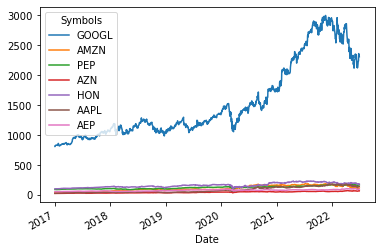

In [18]:
import matplotlib.pyplot as plt

stocks_prices.plot()

plt.show()

In [19]:
def Normalize(data):
    
    x = data.copy()
    for i in x.columns:
        x[i] = x[i]/x[i][0]
    return x

In [20]:
Normalize(stocks_prices)

Symbols        GOOGL      AMZN       PEP       AZN       HON      AAPL  \
Date                                                                     
2017-01-03  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2017-01-04  0.999703  1.004657  1.001911  1.007939  1.002754  0.998881   
2017-01-05  1.006200  1.035533  1.000573  1.035366  1.004992  1.003960   
2017-01-06  1.021287  1.056152  0.999140  1.025984  1.020227  1.015153   
2017-01-09  1.023725  1.057386  0.988629  1.029592  1.011792  1.024451   
...              ...       ...       ...       ...       ...       ...   
2022-06-22  2.759557  2.891186  1.817842  2.778856  1.784303  4.965580   
2022-06-23  2.778233  2.983799  1.841066  2.818210  1.752578  5.072706   
2022-06-24  2.920137  3.090477  1.863841  2.925342  1.807293  5.197074   
2022-06-27  2.867130  3.004498  1.866309  2.908288  1.789925  5.197074   
2022-06-28  2.857551  3.002773  1.881791  2.894296  1.810225  5.201110   

Symbols          AEP  
Date                  
2017-01-03  1.000000  
2017-01-04  1.001434  
2017-01-05  1.006852  
2017-01-06  1.006055  
2017-01-09  0.992830  
...              ...  
2022-06-22  1.734544  
2022-06-23  1.774877  
2022-06-24  1.797733  
2022-06-27  1.824238  
2022-06-28  1.843061  

[1381 rows x 7 columns]

In [21]:
import plotly.express as px


In [23]:
def plotly_plot (data, title): 
    fig = px.line(title = title)
    for i in data.columns:
        fig.add_scatter(x = data.index, y = data[i], name = i)
    fig.show()

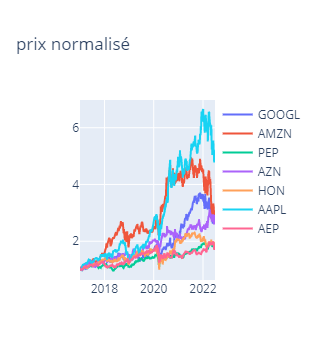

In [24]:
plotly_plot(Normalize(stocks_prices), 'prix normalisé')

In [25]:
for col in stocks_prices.columns:
    rendement = (stocks_prices[col][-1]-stocks_prices[col][0])/stocks_prices[col][0]
    print(col, rendement, '%')

GOOGL 1.8575511487912924 %
AMZN 2.0027731934686863 %
PEP 0.8817912838302193 %
AZN 1.89429579935156 %
HON 0.8102253717899226 %
AAPL 4.201109856540434 %
AEP 0.8430605398603835 %


In [26]:
n_days = 252

In [27]:
returns = stocks_prices.pct_change()
returns

Symbols        GOOGL      AMZN       PEP       AZN       HON      AAPL  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04 -0.000297  0.004657  0.001911  0.007939  0.002754 -0.001119   
2017-01-05  0.006499  0.030732 -0.001335  0.027211  0.002232  0.005085   
2017-01-06  0.014993  0.019912 -0.001433 -0.009062  0.015160  0.011148   
2017-01-09  0.002387  0.001168 -0.010520  0.003517 -0.008268  0.009159   
...              ...       ...       ...       ...       ...       ...   
2022-06-22 -0.000506  0.002484  0.008214  0.011459 -0.015401 -0.003827   
2022-06-23  0.006768  0.032033  0.012775  0.014162 -0.017780  0.021574   
2022-06-24  0.051077  0.035752  0.012370  0.038014  0.031220  0.024517   
2022-06-27 -0.018152 -0.027821  0.001324 -0.005830 -0.009610  0.000000   
2022-06-28 -0.003341 -0.000574  0.008296 -0.004811  0.011342  0.000777   

Symbols          AEP  
Date                  
2017-01-03       NaN  
2017-01-04  0.001434  
2017-01-05  0.005410  
2017-01-06 -0.000791  
2017-01-09 -0.013145  
...              ...  
2022-06-22  0.004002  
2022-06-23  0.023253  
2022-06-24  0.012877  
2022-06-27  0.014744  
2022-06-28  0.010318  

[1381 rows x 7 columns]

In [28]:
returns = returns.dropna()
returns

Symbols        GOOGL      AMZN       PEP       AZN       HON      AAPL  \
Date                                                                     
2017-01-04 -0.000297  0.004657  0.001911  0.007939  0.002754 -0.001119   
2017-01-05  0.006499  0.030732 -0.001335  0.027211  0.002232  0.005085   
2017-01-06  0.014993  0.019912 -0.001433 -0.009062  0.015160  0.011148   
2017-01-09  0.002387  0.001168 -0.010520  0.003517 -0.008268  0.009159   
2017-01-10 -0.001414 -0.001280 -0.014402  0.007711  0.002552  0.001009   
...              ...       ...       ...       ...       ...       ...   
2022-06-22 -0.000506  0.002484  0.008214  0.011459 -0.015401 -0.003827   
2022-06-23  0.006768  0.032033  0.012775  0.014162 -0.017780  0.021574   
2022-06-24  0.051077  0.035752  0.012370  0.038014  0.031220  0.024517   
2022-06-27 -0.018152 -0.027821  0.001324 -0.005830 -0.009610  0.000000   
2022-06-28 -0.003341 -0.000574  0.008296 -0.004811  0.011342  0.000777   

Symbols          AEP  
Date                  
2017-01-04  0.001434  
2017-01-05  0.005410  
2017-01-06 -0.000791  
2017-01-09 -0.013145  
2017-01-10 -0.003049  
...              ...  
2022-06-22  0.004002  
2022-06-23  0.023253  
2022-06-24  0.012877  
2022-06-27  0.014744  
2022-06-28  0.010318  

[1380 rows x 7 columns]

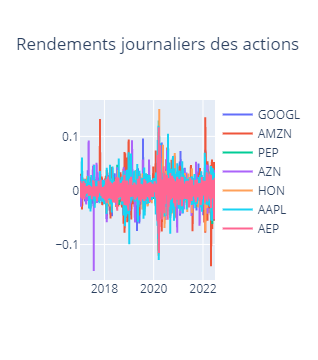

In [29]:
plotly_plot(returns, ' Rendements journaliers des actions')

In [30]:
returns.corr()

Symbols     GOOGL      AMZN       PEP       AZN       HON      AAPL       AEP
Symbols                                                                      
GOOGL    1.000000  0.667458  0.445905  0.324678  0.526976  0.676289  0.250734
AMZN     0.667458  1.000000  0.309759  0.246309  0.323623  0.635569  0.152793
PEP      0.445905  0.309759  1.000000  0.347831  0.483081  0.482977  0.632362
AZN      0.324678  0.246309  0.347831  1.000000  0.290341  0.324471  0.242589
HON      0.526976  0.323623  0.483081  0.290341  1.000000  0.499931  0.363035
AAPL     0.676289  0.635569  0.482977  0.324471  0.499931  1.000000  0.281339
AEP      0.250734  0.152793  0.632362  0.242589  0.363035  0.281339  1.000000

In [31]:
returns.mean()*100

Symbols
GOOGL    0.091911
AMZN     0.100375
PEP      0.054510
AZN      0.090414
HON      0.055776
AAPL     0.138606
AEP      0.053618
dtype: float64

In [33]:
returns.mean()*n_days*100

Symbols
GOOGL    23.161526
AMZN     25.294607
PEP      13.736615
AZN      22.784264
HON      14.055503
AAPL     34.928614
AEP      13.511838
dtype: float64

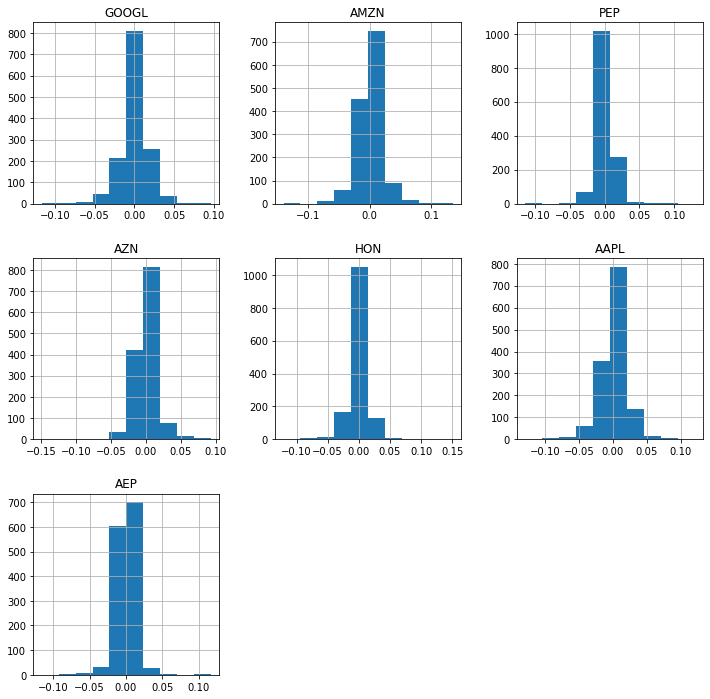

In [34]:
returns.hist(figsize=(12,12));

In [36]:
returns.describe()

Symbols        GOOGL         AMZN          PEP          AZN          HON  \
count    1380.000000  1380.000000  1380.000000  1380.000000  1380.000000   
mean        0.000919     0.001004     0.000545     0.000904     0.000558   
std         0.017770     0.020335     0.013164     0.016315     0.015981   
min        -0.116342    -0.140494    -0.114283    -0.149087    -0.120868   
25%        -0.006495    -0.008104    -0.004696    -0.006811    -0.005647   
50%         0.001294     0.001391     0.000739     0.001000     0.000964   
75%         0.009542     0.010932     0.006215     0.008762     0.007808   
max         0.096202     0.135359     0.129366     0.092947     0.150684   

Symbols         AAPL          AEP  
count    1380.000000  1380.000000  
mean        0.001386     0.000536  
std         0.019513     0.013634  
min        -0.128647    -0.115827  
25%        -0.006933    -0.005271  
50%         0.001140     0.001258  
75%         0.011170     0.006885  
max         0.119808     0.116826

In [37]:
returns.std()

Symbols
GOOGL    0.017770
AMZN     0.020335
PEP      0.013164
AZN      0.016315
HON      0.015981
AAPL     0.019513
AEP      0.013634
dtype: float64

In [38]:
for col in returns.columns:
    print("la volatilité anualisé de l'action de", col, 'est égale à', round(returns[col].std()*np.sqrt(n_days)*100,2), ' % par an')

la volatilité de l'action de GOOGL est égale à 28.21  % par an
la volatilité de l'action de AMZN est égale à 32.28  % par an
la volatilité de l'action de PEP est égale à 20.9  % par an
la volatilité de l'action de AZN est égale à 25.9  % par an
la volatilité de l'action de HON est égale à 25.37  % par an
la volatilité de l'action de AAPL est égale à 30.98  % par an
la volatilité de l'action de AEP est égale à 21.64  % par an


In [42]:

for col in returns.columns:
    print("la volatilité mensuelle de l'action de", col, 'est égale à', round(returns[col].std()*np.sqrt(21)*100,2), '%')

la volatilité mensuelle de l'action de GOOGL est égale à 8.14 %
la volatilité mensuelle de l'action de AMZN est égale à 9.32 %
la volatilité mensuelle de l'action de PEP est égale à 6.03 %
la volatilité mensuelle de l'action de AZN est égale à 7.48 %
la volatilité mensuelle de l'action de HON est égale à 7.32 %
la volatilité mensuelle de l'action de AAPL est égale à 8.94 %
la volatilité mensuelle de l'action de AEP est égale à 6.25 %


In [44]:
def sharpe_ratio(serie, rf= 0.025):
    #rendement anualisé
    rp = serie.mean()* n_days
    #volatilité annuelle
    volatility = serie.std() * np.sqrt(n_days)
    #ratio de sharpe
    sharpe = (rp-rf)/volatility
    return sharpe

In [47]:
for col in returns.columns:
    print("le ratio de sharpe de l'action de ", col, "est égal à", round(sharpe_ratio(returns[col]),2))

le ratio de sharpe de l'action de  GOOGL est égal à 0.73
le ratio de sharpe de l'action de  AMZN est égal à 0.71
le ratio de sharpe de l'action de  PEP est égal à 0.54
le ratio de sharpe de l'action de  AZN est égal à 0.78
le ratio de sharpe de l'action de  HON est égal à 0.46
le ratio de sharpe de l'action de  AAPL est égal à 1.05
le ratio de sharpe de l'action de  AEP est égal à 0.51
